In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import scale

In [2]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df.head(10)

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   
5       6          2                  audi fox      gas        std        two   
6       7          1                audi 100ls      gas        std       four   
7       8          1                 audi 5000      gas        std       four   
8       9          1                 audi 4000      gas      turbo       four   
9      10          0       audi 5000s (diesel)      gas      turbo        two   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   
5        sedan        fwd          front       99.8  ...         136   
6        sedan        fwd          front      105.8  ...         136   
7        wagon        fwd          front      105.8  ...         136   
8        sedan        fwd          front      105.8  ...         131   
9    hatchback        4wd          front       99.5  ...         131   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   
5        mpfi       3.19    3.40              8.5        110     5500      19   
6        mpfi       3.19    3.40              8.5        110     5500      19   
7        mpfi       3.19    3.40              8.5        110     5500      19   
8        mpfi       3.13    3.40              8.3        140     5500      17   
9        mpfi       3.13    3.40              7.0        160     5500      16   

   highwaympg      price  
0          27  13495.000  
1          27  16500.000  
2          26  16500.000  
3          30  13950.000  
4          22  17450.000  
5          25  15250.000  
6          25  17710.000  
7          25  18920.000  
8          20  23875.000  
9          22  17859.167  

[10 rows x 26 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [5]:
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [6]:
pd.DataFrame(df.apply(lambda col: len(col.unique())),columns=["Unique Values Count"])

Unique Values Count
car_ID                            205
symboling                           6
CarName                           147
fueltype                            2
aspiration                          2
doornumber                          2
carbody                             5
drivewheel                          3
enginelocation                      2
wheelbase                          53
carlength                          75
carwidth                           44
carheight                          49
curbweight                        171
enginetype                          7
cylindernumber                      7
enginesize                         44
fuelsystem                          8
boreratio                          38
stroke                             37
compressionratio                   32
horsepower                         59
peakrpm                            23
citympg                            29
highwaympg                         30
price                             189

## Cleaning the Data

In [7]:
df['CarName'] = df['CarName'].str.split(' ',expand=True)[0]

In [8]:
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [9]:
df['CarName'] = df['CarName'].replace({'maxda': 'mazda', 'nissan': 'Nissan', 'porcshce': 'porsche', 'toyouta': 'toyota', 
                            'vokswagen': 'volkswagen', 'vw': 'volkswagen'})

In [10]:
df.drop('car_ID',axis=1,inplace=True)

In [11]:
df['symboling']=df['symboling'].astype('str')

In [12]:
categorical_cols=df.select_dtypes(include=['object']).columns

In [13]:
df[categorical_cols].head()

symboling      CarName fueltype aspiration doornumber      carbody  \
0         3  alfa-romero      gas        std        two  convertible   
1         3  alfa-romero      gas        std        two  convertible   
2         1  alfa-romero      gas        std        two    hatchback   
3         2         audi      gas        std       four        sedan   
4         2         audi      gas        std       four        sedan   

  drivewheel enginelocation enginetype cylindernumber fuelsystem  
0        rwd          front       dohc           four       mpfi  
1        rwd          front       dohc           four       mpfi  
2        rwd          front       ohcv            six       mpfi  
3        fwd          front        ohc           four       mpfi  
4        4wd          front        ohc           five       mpfi

# Data Visualization

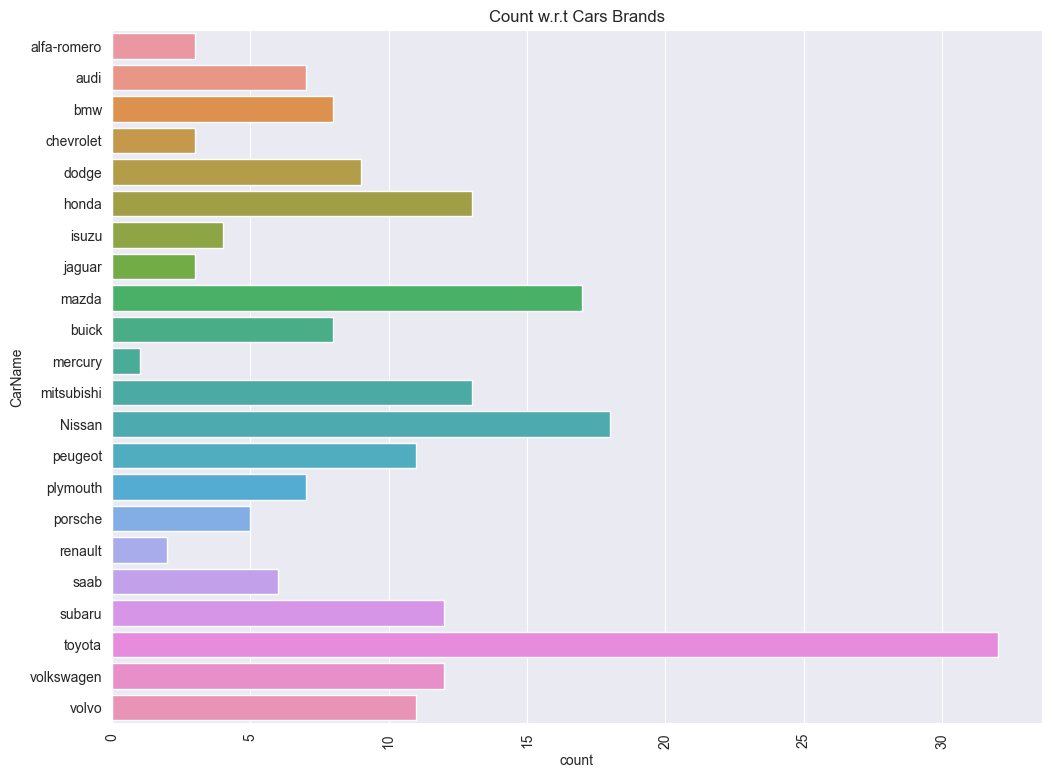

In [14]:
plt.figure(figsize=(12,9))
sns.set_style("darkgrid")
sns.countplot(y='CarName',data=df)
plt.xticks(rotation=90)
plt.title('Count w.r.t Cars Brands')
plt.show()

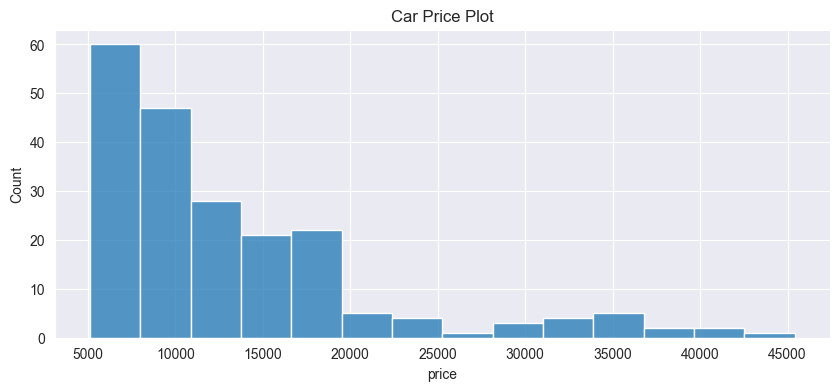

In [15]:
plt.figure(figsize=(10,4))
plt.title('Car Price Plot')
sns.histplot(df['price'])
plt.show()

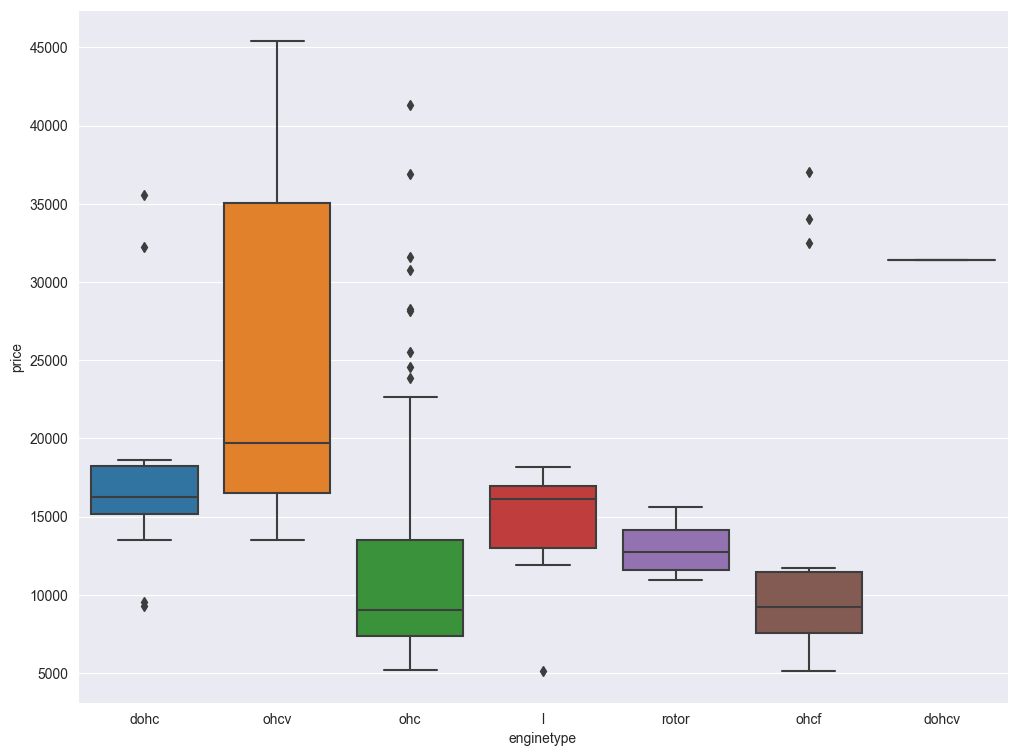

In [16]:
plt.figure(figsize=(12,9))
sns.boxplot(x = 'enginetype', y = 'price', data = df)

plt.show()

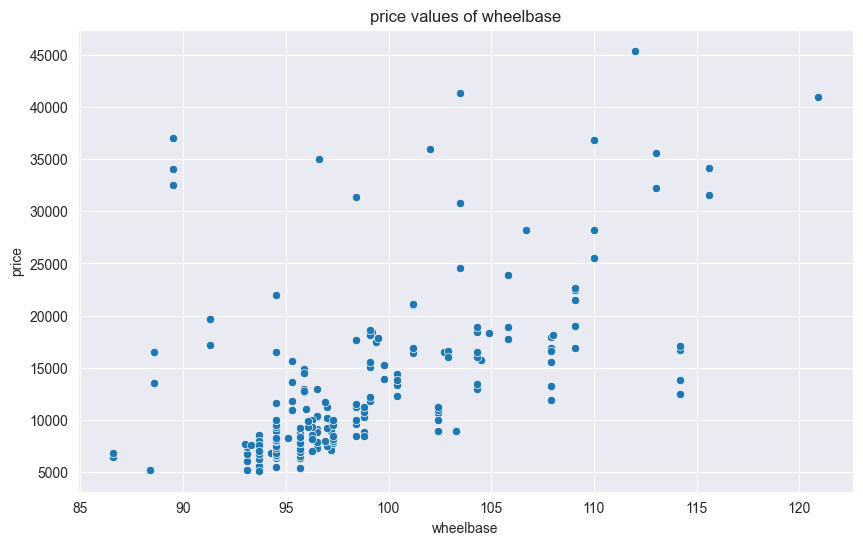

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="wheelbase", y="price", data=df)
plt.title('price values of wheelbase')
plt.show()

In [18]:
fuel=df['fueltype'].value_counts()
fuel

gas       185
diesel     20
Name: fueltype, dtype: int64

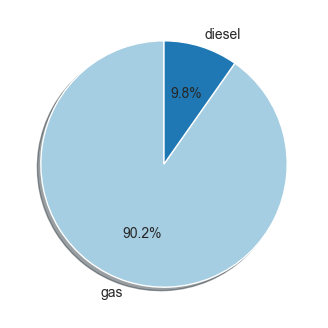

In [19]:
labels=fuel.index
sizes=fuel.values
plt.figure(figsize=(10,4))
colors = sns.color_palette('Paired')
plt.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True,colors=colors,startangle=90)
plt.show()

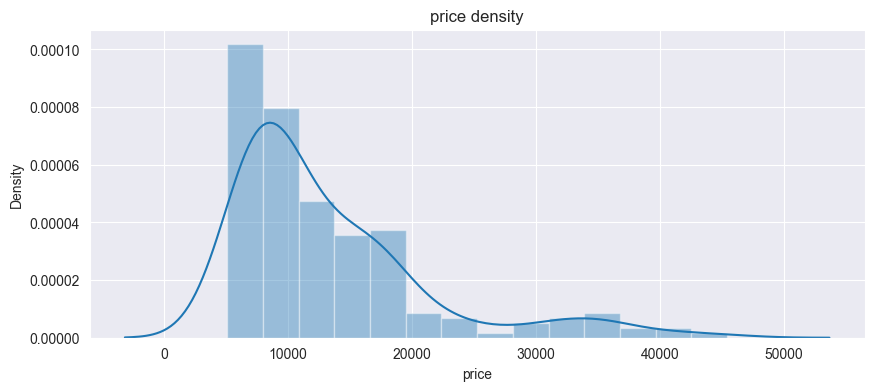

In [20]:
plt.figure(figsize=(10,4))
sns.distplot(df['price'])
plt.title('price density')
plt.show()

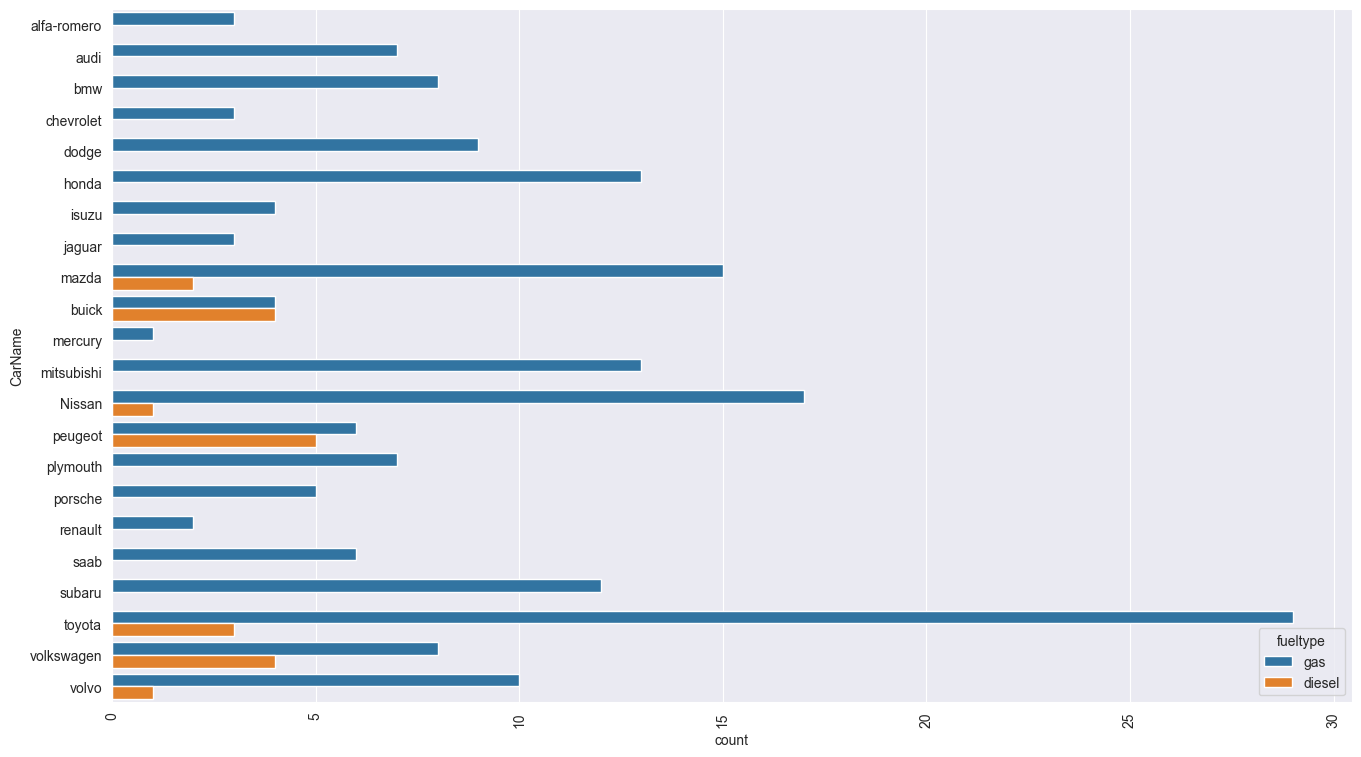

In [21]:
plt.figure(figsize=(16,9))
sns.countplot(y='CarName', hue='fueltype', data=df)
plt.xticks(rotation=90)
plt.show()

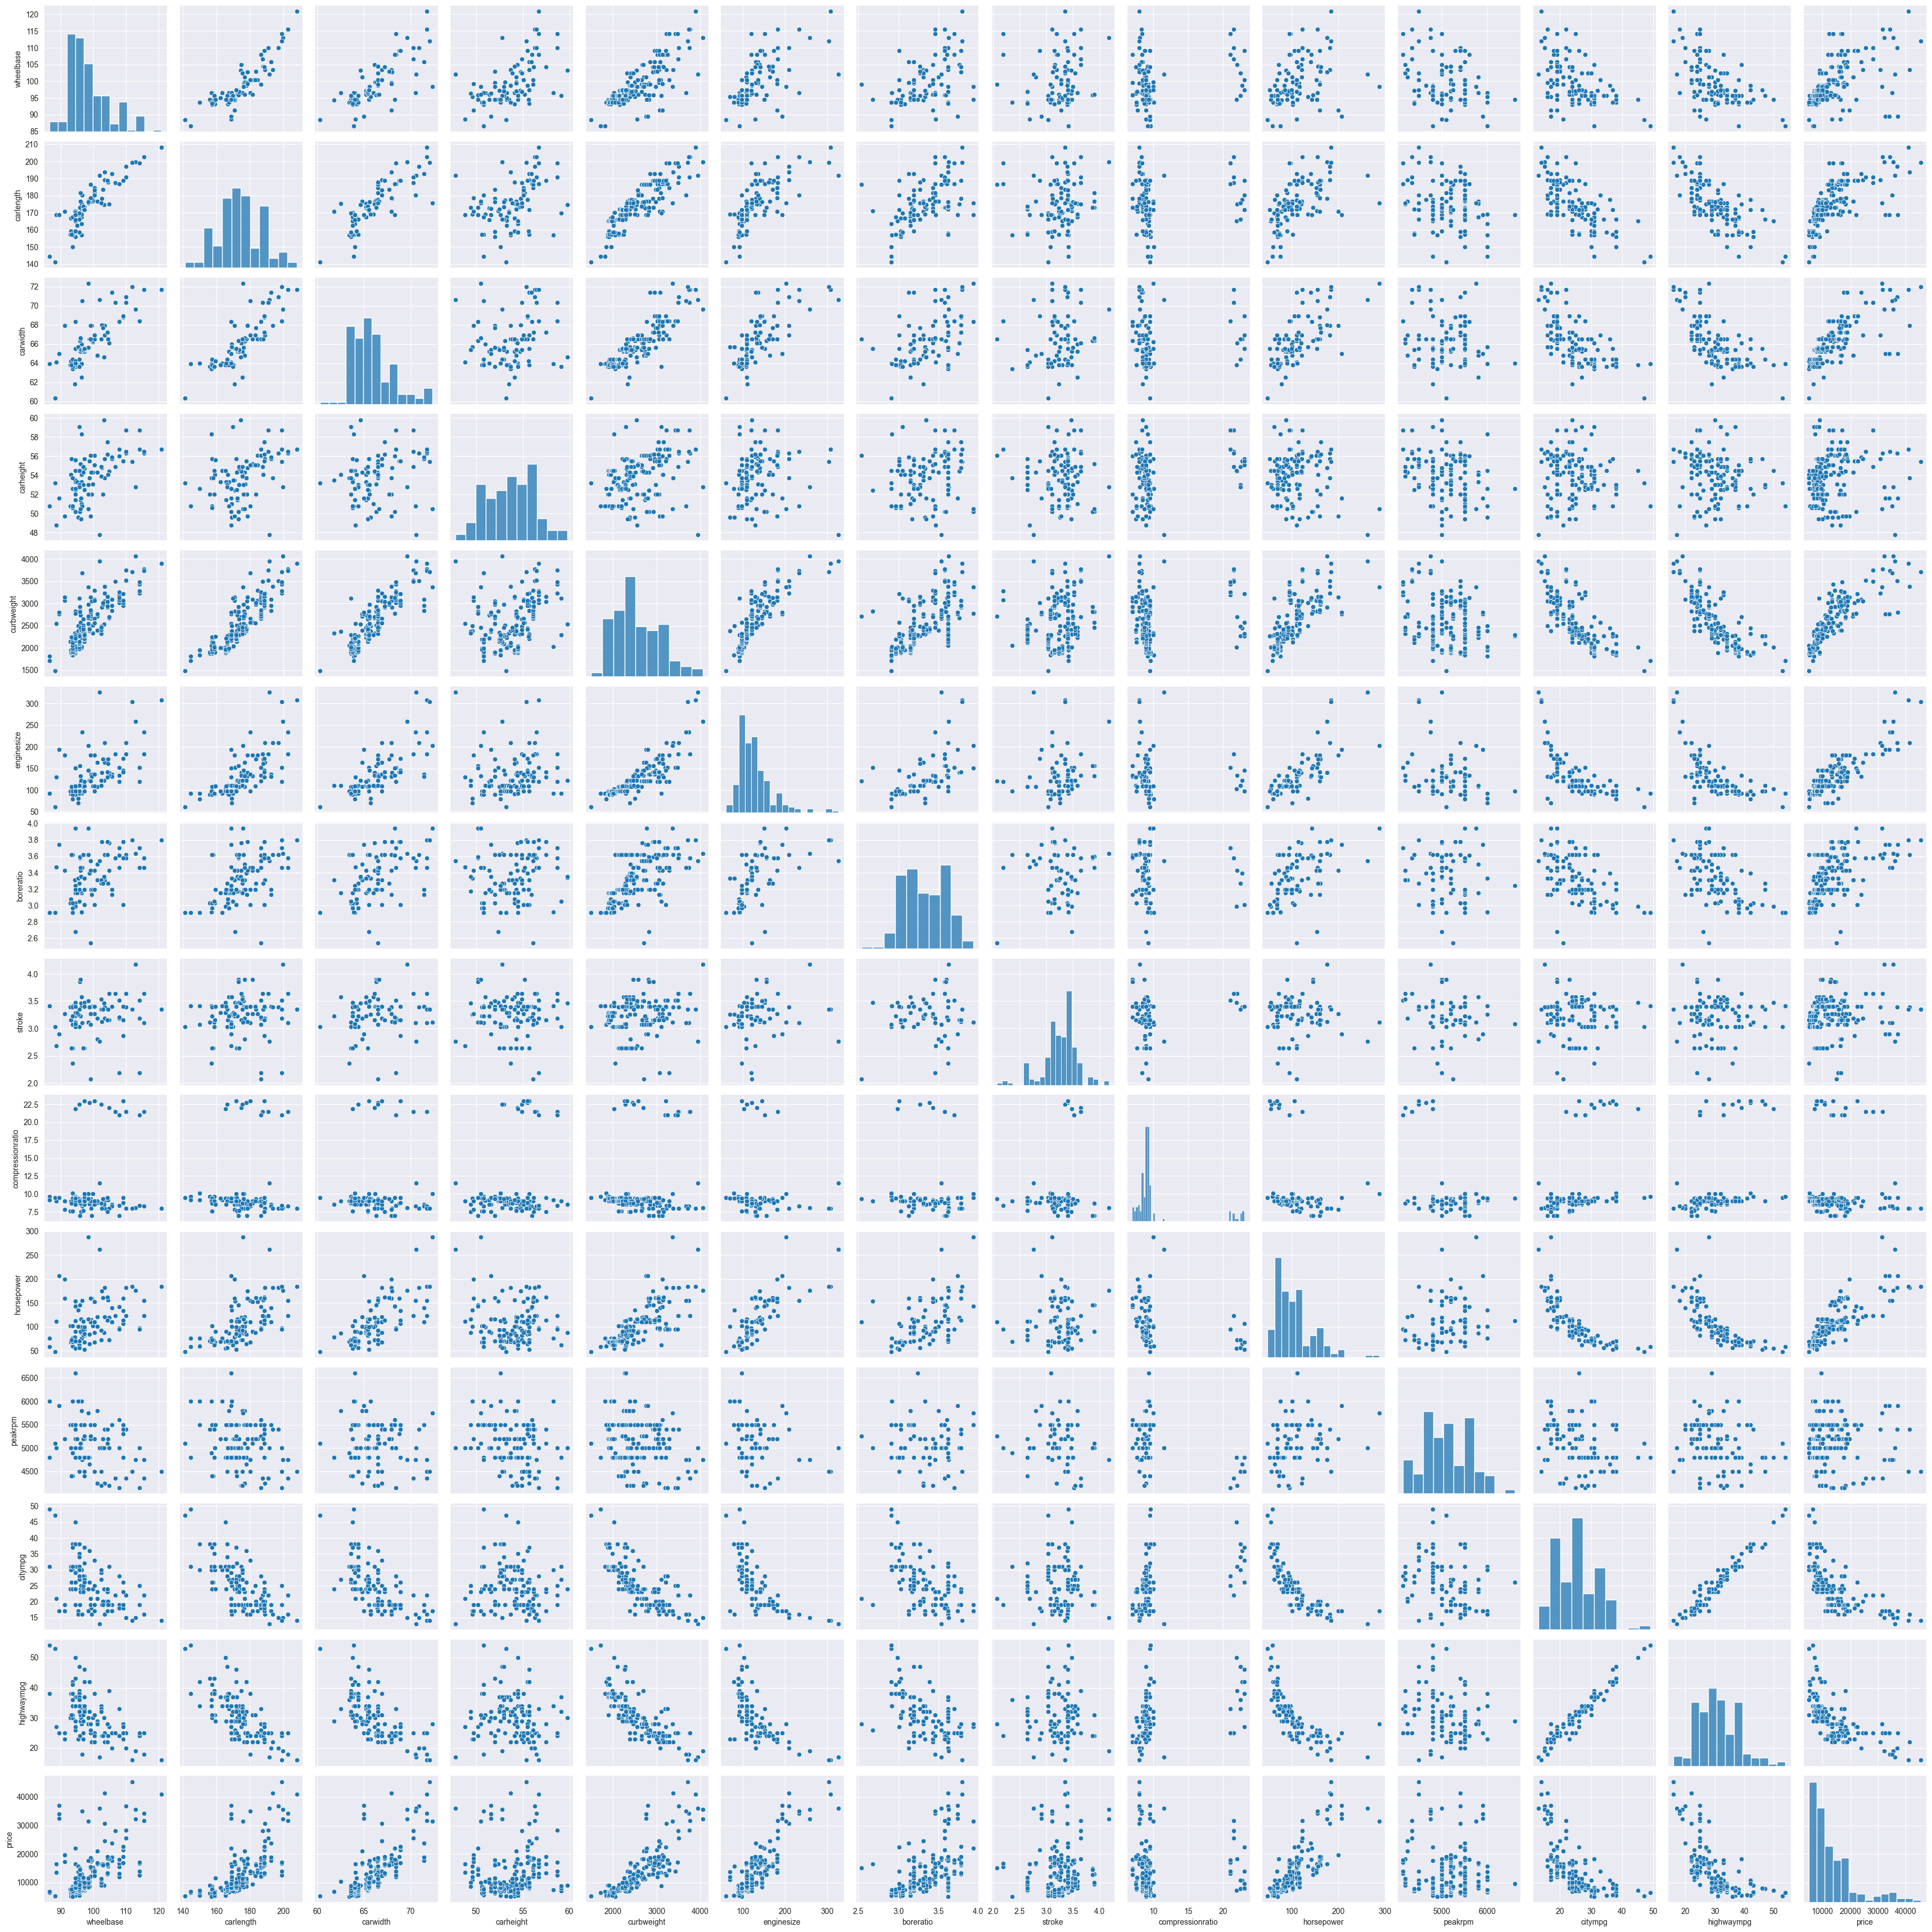

In [22]:
sns.pairplot(df)

<AxesSubplot:>

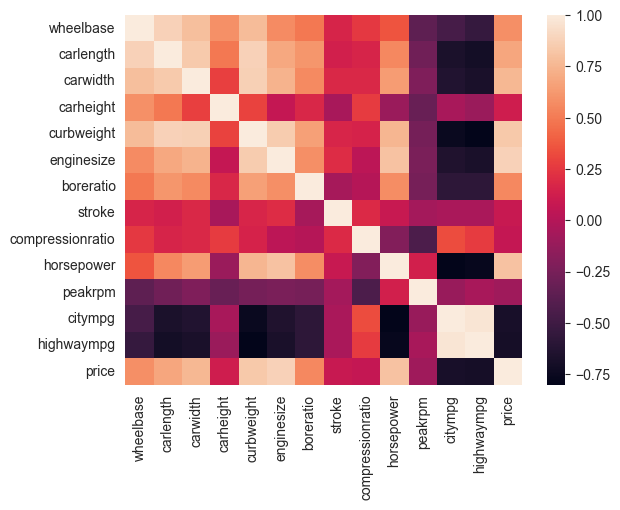

In [23]:
sns.heatmap(df.corr())

# Encoding categorical columns

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['CarName'] = le.fit_transform(df['CarName'])
df['fueltype'] = le.fit_transform(df['fueltype'])
df['aspiration'] = le.fit_transform(df['aspiration'])
df['doornumber'] = le.fit_transform(df['doornumber'])
df['carbody'] = le.fit_transform(df['carbody'])
df['drivewheel'] = le.fit_transform(df['drivewheel'])
df['enginelocation'] = le.fit_transform(df['enginelocation'])
df['enginetype'] = le.fit_transform(df['enginetype'])
df['cylindernumber'] = le.fit_transform(df['cylindernumber'])
df['fuelsystem'] = le.fit_transform(df['fuelsystem'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null object
CarName             205 non-null int32
fueltype            205 non-null int32
aspiration          205 non-null int32
doornumber          205 non-null int32
carbody             205 non-null int32
drivewheel          205 non-null int32
enginelocation      205 non-null int32
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null int32
cylindernumber      205 non-null int32
enginesize          205 non-null int64
fuelsystem          205 non-null int32
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             20

In [26]:
numerical_cols=df.select_dtypes(exclude=['object']).columns

In [27]:
df[numerical_cols].head()

CarName  fueltype  aspiration  doornumber  carbody  drivewheel  \
0        1         1           0           1        0           2   
1        1         1           0           1        0           2   
2        1         1           0           1        2           2   
3        2         1           0           0        3           1   
4        2         1           0           0        3           0   

   enginelocation  wheelbase  carlength  carwidth  ...  enginesize  \
0               0       88.6      168.8      64.1  ...         130   
1               0       88.6      168.8      64.1  ...         130   
2               0       94.5      171.2      65.5  ...         152   
3               0       99.8      176.6      66.2  ...         109   
4               0       99.4      176.6      66.4  ...         136   

   fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  \
0           5       3.47    2.68               9.0         111     5000   
1           5       3.47    2.68               9.0         111     5000   
2           5       2.68    3.47               9.0         154     5000   
3           5       3.19    3.40              10.0         102     5500   
4           5       3.19    3.40               8.0         115     5500   

   citympg  highwaympg    price  
0       21          27  13495.0  
1       21          27  16500.0  
2       19          26  16500.0  
3       24          30  13950.0  
4       18          22  17450.0  

[5 rows x 24 columns]

In [28]:
df.head()

symboling  CarName  fueltype  aspiration  doornumber  carbody  drivewheel  \
0         3        1         1           0           1        0           2   
1         3        1         1           0           1        0           2   
2         1        1         1           0           1        2           2   
3         2        2         1           0           0        3           1   
4         2        2         1           0           0        3           0   

   enginelocation  wheelbase  carlength  ...  enginesize  fuelsystem  \
0               0       88.6      168.8  ...         130           5   
1               0       88.6      168.8  ...         130           5   
2               0       94.5      171.2  ...         152           5   
3               0       99.8      176.6  ...         109           5   
4               0       99.4      176.6  ...         136           5   

   boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  \
0       3.47    2.68               9.0         111     5000       21   
1       3.47    2.68               9.0         111     5000       21   
2       2.68    3.47               9.0         154     5000       19   
3       3.19    3.40              10.0         102     5500       24   
4       3.19    3.40               8.0         115     5500       18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 25 columns]

# Outlier Detection & Removal

<AxesSubplot:xlabel='enginesize'>

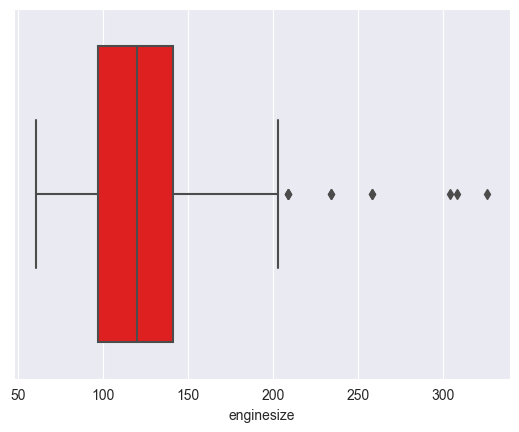

In [37]:
sns.boxplot(df['enginesize'],color='red')

In [40]:
df['enginesize']=df['enginesize'].rank()

<AxesSubplot:xlabel='enginesize'>

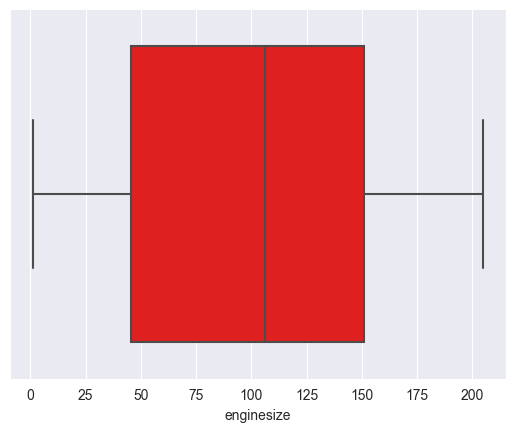

In [41]:
sns.boxplot(df['enginesize'],color='red')

In [29]:
from sklearn.model_selection import train_test_split
x = df.drop(['price'],axis=1)
y = df['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [30]:
cols=x.columns
cols

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],
      dtype='object')

In [31]:
cols=x.columns
X=pd.DataFrame(scale(x))
X.columns=cols
X

symboling   CarName  fueltype  aspiration  doornumber   carbody  \
0     1.743470 -1.541331  0.328798   -0.469295    1.130388 -3.050975   
1     1.743470 -1.541331  0.328798   -0.469295    1.130388 -3.050975   
2     0.133509 -1.541331  0.328798   -0.469295    1.130388 -0.717207   
3     0.938490 -1.395654  0.328798   -0.469295   -0.884652  0.449677   
4     0.938490 -1.395654  0.328798   -0.469295   -0.884652  0.449677   
..         ...       ...       ...         ...         ...       ...   
200  -1.476452  1.372204  0.328798   -0.469295   -0.884652  0.449677   
201  -1.476452  1.372204  0.328798    2.130854   -0.884652  0.449677   
202  -1.476452  1.372204  0.328798   -0.469295   -0.884652  0.449677   
203  -1.476452  1.372204 -3.041381    2.130854   -0.884652  0.449677   
204  -1.476452  1.372204  0.328798    2.130854   -0.884652  0.449677   

     drivewheel  enginelocation  wheelbase  carlength  ...  cylindernumber  \
0      1.213330       -0.121867  -1.690772  -0.426521  ...       -0.147475   
1      1.213330       -0.121867  -1.690772  -0.426521  ...       -0.147475   
2      1.213330       -0.121867  -0.708596  -0.231513  ...        1.112210   
3     -0.589081       -0.121867   0.173698   0.207256  ...       -0.147475   
4     -2.391492       -0.121867   0.107110   0.207256  ...       -1.407161   
..          ...             ...        ...        ...  ...             ...   
200    1.213330       -0.121867   1.721873   1.198549  ...       -0.147475   
201    1.213330       -0.121867   1.721873   1.198549  ...       -0.147475   
202    1.213330       -0.121867   1.721873   1.198549  ...        1.112210   
203    1.213330       -0.121867   1.721873   1.198549  ...        1.112210   
204    1.213330       -0.121867   1.721873   1.198549  ...       -0.147475   

     enginesize  fuelsystem  boreratio    stroke  compressionratio  \
0      0.074449    0.869568   0.519071 -1.839377         -0.288349   
1      0.074449    0.869568   0.519071 -1.839377         -0.288349   
2      0.604046    0.869568  -2.404880  0.685946         -0.288349   
3     -0.431076    0.869568  -0.517266  0.462183         -0.035973   
4      0.218885    0.869568  -0.517266  0.462183         -0.540725   
..          ...         ...        ...       ...               ...   
200    0.339248    0.869568   1.666445 -0.336970         -0.162161   
201    0.339248    0.869568   1.666445 -0.336970         -0.364062   
202    1.109571    0.869568   0.926204 -1.232021         -0.338824   
203    0.435538   -0.126306  -1.183483  0.462183          3.244916   
204    0.339248    0.869568   1.666445 -0.336970         -0.162161   

     horsepower   peakrpm   citympg  highwaympg  
0      0.174483 -0.262960 -0.646553   -0.546059  
1      0.174483 -0.262960 -0.646553   -0.546059  
2      1.264536 -0.262960 -0.953012   -0.691627  
3     -0.053668  0.787855 -0.186865   -0.109354  
4      0.275883  0.787855 -1.106241   -1.273900  
..          ...       ...       ...         ...  
200    0.250533  0.577692 -0.340094   -0.400490  
201    1.416637  0.367529 -0.953012   -0.837195  
202    0.757535  0.787855 -1.106241   -1.128332  
203    0.047732 -0.683286  0.119594   -0.546059  
204    0.250533  0.577692 -0.953012   -0.837195  

[205 rows x 24 columns]

In [32]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((143, 24), (62, 24), (143,), (62,))

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7979578772559579

In [34]:
from sklearn.linear_model import Lasso
model = Lasso()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.7999958824788262

In [35]:
#Ridge = Linear least squares with l2 regularization
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8102688041315067